<a href="https://colab.research.google.com/github/BenRyan-8/APA_CA/blob/main/BERPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [230]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/FourthYear/APA/BERsmall.xlsx')

In [231]:
df.columns.tolist()

['CountyName',
 'DwellingTypeDescr',
 'Year_of_Construction',
 'TypeofRating',
 'EnergyRating',
 'BerRating',
 'GroundFloorArea(sq m)',
 'UValueWall',
 'UValueRoof',
 'UValueFloor',
 'UValueWindow',
 'UvalueDoor',
 'WallArea',
 'RoofArea',
 'FloorArea',
 'WindowArea',
 'DoorArea',
 'NoStoreys',
 'CO2Rating',
 'MainSpaceHeatingFuel',
 'MainWaterHeatingFuel',
 'HSMainSystemEfficiency',
 'MultiDwellingMPRN',
 'TGDLEdition',
 'MPCDERValue',
 'HSEffAdjFactor',
 'HSSupplHeatFraction',
 'HSSupplSystemEff',
 'WHMainSystemEff',
 'WHEffAdjFactor',
 'SupplSHFuel',
 'SupplWHFuel',
 'SHRenewableResources',
 'WHRenewableResources',
 'NoOfChimneys',
 'NoOfOpenFlues',
 'NoOfFansAndVents',
 'NoOfFluelessGasFires',
 'DraftLobby',
 'VentilationMethod',
 'FanPowerManuDeclaredValue',
 'HeatExchangerEff',
 'StructureType',
 'SuspendedWoodenFloor',
 'PercentageDraughtStripped',
 'NoOfSidesSheltered',
 'PermeabilityTest',
 'PermeabilityTestResult',
 'TempAdjustment',
 'HeatSystemControlCat',
 'HeatSystemRespo

#Data Cleaning

In [232]:
cols_to_remove = [

    # DIRECT BER COMPONENTS
    "BerRating",
    "CO2Rating",

    # DELIVERED ENERGY FIELDS
    "DeliveredLightingEnergy",
    "DeliveredEnergyPumpsFans",
    "DeliveredEnergyMainWater",
    "DeliveredEnergyMainSpace",
    "DeliveredEnergySecondarySpace",
    "DeliveredEnergySupplementaryWater",
    "TotalDeliveredEnergy",

    # PRIMARY ENERGY FIELDS
    "PrimaryEnergyLighting",
    "PrimaryEnergyPumpsFans",
    "PrimaryEnergyMainWater",
    "PrimaryEnergyMainSpace",
    "PrimaryEnergySecondarySpace",
    "PrimaryEnergySupplementaryWater",

    # CO2 EMISSIONS FIELDS
    "CO2Lighting",
    "CO2PumpsFans",
    "CO2MainWater",
    "CO2MainSpace",
    "CO2SecondarySpace",
    "CO2SupplementaryWater",

    # DEAP COMPLIANCE & PERFORMANCE COEFFICIENTS
    "CPC",
    "EPC",
    "RER",
    "RenewEPnren",
    "RenewEPren",

    # HIGHLY DERIVED / SEMI-LEAKAGE FIELDS
    "LivingAreaPercent",

    # RENEWABLE ENERGY SUBCOMPONENT FIELDS
    # Renewable Energy 1
    "FirstEnergyTypeId",
    "FirstEnergyType_Description",
    "FirstEnerProdComment",
    "FirstEnerProdDelivered",
    "FirstPartLTotalContribution",
    "FirstEnerProdConvFactor",
    "FirstEnerProdCO2EmissionFactor",
    "FirstEnerConsumedComment",
    "FirstEnerConsumedDelivered",
    "FirstEnerConsumedConvFactor",
    "FirstEnerConsumedCO2EmissionFactor",

    # Renewable Energy 2
    "SecondEnergyTypeId",
    "SecondEnergyType_Description",
    "SecondEnerProdComment",
    "SecondEnerProdDelivered",
    "SecondPartLTotalContribution",
    "SecondEnerProdConvFactor",
    "SecondEnerProdCO2EmissionFactor",
    "SecondEnerConsumedComment",
    "SecondEnerConsumedDelivered",
    "SecondEnerConsumedConvFactor",
    "SecondEnerConsumedCO2EmissionFactor",

    # Renewable Energy 3
    "ThirdEnergyTypeId",
    "ThirdEnergyType_Description",
    "ThirdEnerProdComment",
    "ThirdEnerProdDelivered",
    "ThirdPartLTotalContribution",
    "ThirdEnerProdConvFactor",
    "ThirdEnerProdCO2EmissionFactor",
    "ThirdEnerConsumedComment",
    "ThirdEnerConsumedDelivered",
    "ThirdEnerConsumedConvFactor",
    "ThirdEnerConsumedCO2EmissionFactor",

    # GROUP HEATING SCHEME FIELDS
    "ChargingBasisHeatConsumed",
    "gsdHSSupplHeatFraction",
    "gsdHSSupplSystemEff",
    "DistLossFactor",
    "CHPUnitHeatFraction",
    "CHPSystemType",
    "CHPElecEff",
    "CHPHeatEff",
    "CHPFuelType",
    "SupplHSFuelTypeID",
    "gsdSHRenewableResources",
    "gsdWHRenewableResources",
    "SolarHeatFraction",
    "TotalPrimaryEnergyFact",
    "TotalCO2Emissions",

    # WALL-BY-WALL STRUCTURE FIELDS

    # First wall (GA → GG)
    "FirstWallType_Description",
    "FirstWallDescription",
    "FirstWallArea",
    "FirstWallUValue",
    "FirstWallIsSemiExposed",
    "FirstWallAgeBandId",
    "FirstWallTypeId",

    # Second wall (GH → GN)
    "SecondWallType_Description",
    "SecondWallDescription",
    "SecondWallArea",
    "SecondWallUValue",
    "SecondWallIsSemiExposed",
    "SecondWallAgeBandId",
    "SecondWallTypeId",

    # Third wall (GO → GU)
    "ThirdWallType_Description",
    "ThirdWallDescription",
    "ThirdWallArea",
    "ThirdWallUValue",
    "ThirdWallIsSemiExposed",
    "ThirdWallAgeBandId",
    "ThirdWallTypeId",

    # MISCELLANEOUS STRUCTURAL FIELDS
    "UndergroundHeating",
    "GroundFloorUValue",
    "LowEnergyLightingPercent",
    "RoomInRoofArea",
    "PurposeOfRating",
    "DateOfAssessment",
    "VolumeOfPreHeatStore",

    # SPATIAL METADATA
    "SA_Code",
    "prob_smarea_error_0corr",
    "prob_smarea_error_100corr",
]


In [233]:
df.drop(columns=cols_to_remove, inplace=True)

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of missing values for each column
missing_data = df.isnull().sum() / len(df) * 100

# Filter out columns with no missing data if desired, or sort for better visualization
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)


Heatmap overview of missing data

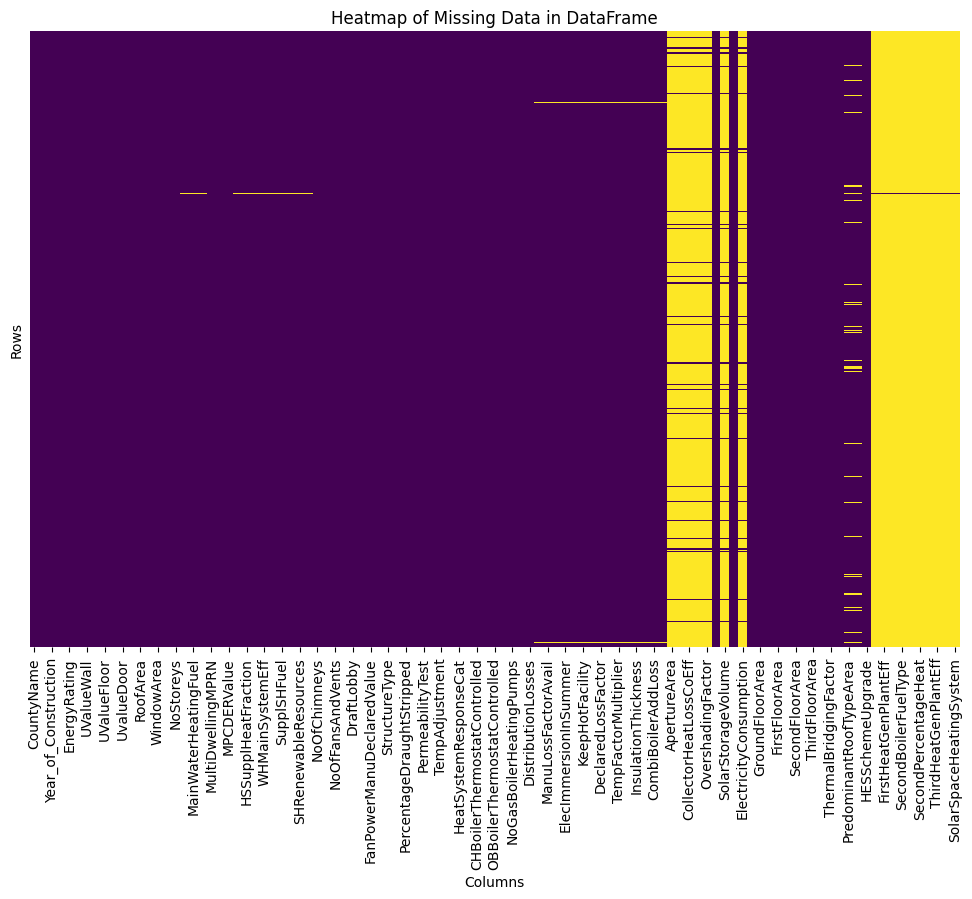

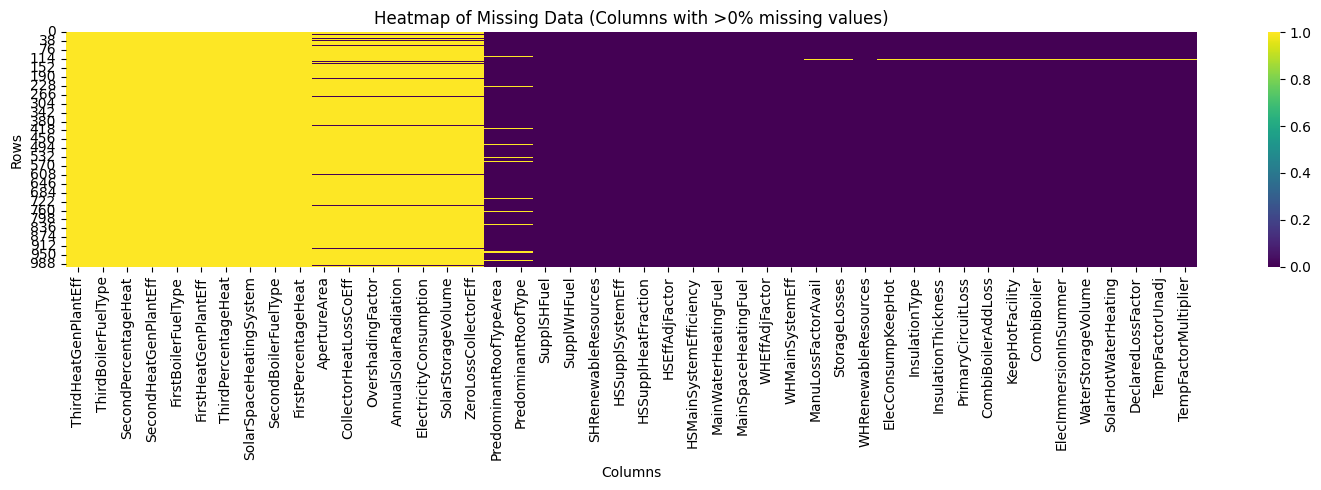

In [235]:
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.isnull(),
    cbar=False,
    cmap='viridis',
    yticklabels=False # Hide yticklabels as it's hard to read for large DFs
)
plt.title('Heatmap of Missing Data in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

# A more detailed heatmap of only columns with missing values (if `missing_data` Series is not empty)
if not missing_data.empty:
    plt.figure(figsize=(15, 5))
    sns.heatmap(
        df[missing_data.index].isnull(),
        cbar=True,
        cmap='viridis'
    )
    plt.title('Heatmap of Missing Data (Columns with >0% missing values)')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No columns with missing values to display a detailed heatmap.")


In [236]:
threshold = 0.9

# Identify columns with > 90% missing
cols_over_90_missing = df.columns[df.isna().mean() > threshold].tolist()

print("Columns with >90% missing:", cols_over_90_missing)
cols_over_90_missing

Columns with >90% missing: ['ApertureArea', 'ZeroLossCollectorEff', 'CollectorHeatLossCoEff', 'AnnualSolarRadiation', 'OvershadingFactor', 'SolarStorageVolume', 'ElectricityConsumption', 'FirstBoilerFuelType', 'FirstHeatGenPlantEff', 'FirstPercentageHeat', 'SecondBoilerFuelType', 'SecondHeatGenPlantEff', 'SecondPercentageHeat', 'ThirdBoilerFuelType', 'ThirdHeatGenPlantEff', 'ThirdPercentageHeat', 'SolarSpaceHeatingSystem']


['ApertureArea',
 'ZeroLossCollectorEff',
 'CollectorHeatLossCoEff',
 'AnnualSolarRadiation',
 'OvershadingFactor',
 'SolarStorageVolume',
 'ElectricityConsumption',
 'FirstBoilerFuelType',
 'FirstHeatGenPlantEff',
 'FirstPercentageHeat',
 'SecondBoilerFuelType',
 'SecondHeatGenPlantEff',
 'SecondPercentageHeat',
 'ThirdBoilerFuelType',
 'ThirdHeatGenPlantEff',
 'ThirdPercentageHeat',
 'SolarSpaceHeatingSystem']

In [237]:
# Filter the missing_data Series to include only columns identified as having >90% missing
missing_data_over_90 = missing_data[missing_data.index.isin(cols_over_90_missing)]

print("Columns with over 90% missing data and their percentages:")
display(missing_data_over_90.sort_values(ascending=False))


Columns with over 90% missing data and their percentages:


,0
ThirdHeatGenPlantEff,99.8
ThirdBoilerFuelType,99.8
SecondPercentageHeat,99.8
SecondHeatGenPlantEff,99.8
FirstBoilerFuelType,99.8
FirstHeatGenPlantEff,99.8
ThirdPercentageHeat,99.8
SolarSpaceHeatingSystem,99.8
SecondBoilerFuelType,99.8
FirstPercentageHeat,99.8


In [238]:
# Drop them
df.drop(columns=cols_over_90_missing, inplace=True)

dropping columns that only contain one value as it doesn't provide any value to the model

In [239]:
cols_to_drop_single_value = []
for col in df.columns:
    if df[col].nunique() == 1:
        cols_to_drop_single_value.append(col)

if cols_to_drop_single_value:
    print(f"Dropping {len(cols_to_drop_single_value)} columns with only one unique value: {cols_to_drop_single_value}")
    df.drop(columns=cols_to_drop_single_value, inplace=True)
    print("Columns dropped successfully.")
else:
    print("No columns found with only one unique value.")

# Display the shape of the DataFrame after dropping columns
print(f"New DataFrame shape: {df.shape}")

No columns found with only one unique value.
New DataFrame shape: (1000, 88)


In [240]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
final_rows = df.shape[0]

print(f"Number of duplicate rows dropped: {initial_rows - final_rows}")

Number of duplicate rows dropped: 9


#Imputation

In [241]:
import numpy as np

# Identify column types automatically
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

In [242]:
numeric_cols, categorical_cols

(['Year_of_Construction',
  'GroundFloorArea(sq m)',
  'UValueWall',
  'UValueRoof',
  'UValueFloor',
  'UValueWindow',
  'UvalueDoor',
  'WallArea',
  'RoofArea',
  'FloorArea',
  'WindowArea',
  'DoorArea',
  'NoStoreys',
  'HSMainSystemEfficiency',
  'TGDLEdition',
  'MPCDERValue',
  'HSEffAdjFactor',
  'HSSupplHeatFraction',
  'HSSupplSystemEff',
  'WHMainSystemEff',
  'WHEffAdjFactor',
  'SupplSHFuel',
  'SupplWHFuel',
  'SHRenewableResources',
  'WHRenewableResources',
  'NoOfChimneys',
  'NoOfOpenFlues',
  'NoOfFansAndVents',
  'NoOfFluelessGasFires',
  'FanPowerManuDeclaredValue',
  'HeatExchangerEff',
  'PercentageDraughtStripped',
  'NoOfSidesSheltered',
  'PermeabilityTestResult',
  'TempAdjustment',
  'HeatSystemControlCat',
  'HeatSystemResponseCat',
  'NoCentralHeatingPumps',
  'NoOilBoilerHeatingPumps',
  'NoGasBoilerHeatingPumps',
  'DistributionLosses',
  'WaterStorageVolume',
  'DeclaredLossFactor',
  'TempFactorUnadj',
  'TempFactorMultiplier',
  'InsulationThickness

##Numerical Imputation

In [243]:

numerical_but_categorical = [
    "TGDLEdition",
    "HSEffAdjFactor",
    "WHEffAdjFactor",
    "HeatSystemControlCat",
    "HeatSystemResponseCat",
    "ThermalMassCategory",
    "PredominantRoofType"
]

# Move overrides into categorical
for col in numerical_but_categorical:
    if col in numeric_cols:
        numeric_cols.remove(col)
    if col not in categorical_cols:
        categorical_cols.append(col)

df[numerical_but_categorical] = df[numerical_but_categorical].astype("object")


In [244]:
def detect_numeric_categoricals(df, numeric_cols, threshold=10):
    numeric_categoricals = []

    for col in numeric_cols:
        name = col.lower()

        # Skip count-like numeric columns
        if name.startswith("no"):
            continue

        uniques = df[col].dropna().unique()
        nunique = len(uniques)

        # Rule 1: name keywords
        if any(keyword in name for keyword in ["cat", "category", "type", "fuel", "scheme"]):
            numeric_categoricals.append(col)
            continue

        # Rule 2: small number of integer codes
        if nunique <= threshold and all(float(v).is_integer() for v in uniques):
            numeric_categoricals.append(col)

    return numeric_categoricals


numeric_categoricals = detect_numeric_categoricals(df, numeric_cols)
numeric_categoricals



['SupplSHFuel',
 'SupplWHFuel',
 'SHRenewableResources',
 'WHRenewableResources',
 'HeatExchangerEff',
 'PredominantRoofTypeArea',
 'HESSchemeUpgrade']

In [245]:
for col in numeric_categoricals:
    if col in numeric_cols:
        numeric_cols.remove(col)
    if col not in categorical_cols:
        categorical_cols.append(col)
    df[col] = df[col].astype("object")


##Categorical Imputation

In [246]:
def inspect_no_none_usage(df, categorical_cols):
    results = []

    for col in categorical_cols:
        uniques = df[col].dropna().unique()

        uses_no = any(
            str(v).strip().lower() == "no" for v in uniques
        )
        uses_none = any(
            str(v).strip().lower() == "none" for v in uniques
        )

        if uses_no or uses_none:
            results.append({
                "column": col,
                "uses_No": uses_no,
                "uses_None": uses_none,
                "unique_values": uniques
            })

    return pd.DataFrame(results)

# Run it
usage_df = inspect_no_none_usage(df, categorical_cols)

usage_df


,column,uses_No,uses_None,unique_values
0,MultiDwellingMPRN,True,False,"[NO, YES]"
1,DraftLobby,True,False,"[NO, YES]"
2,SuspendedWoodenFloor,True,False,"[No , Yes (Sealed) ..."
3,PermeabilityTest,True,False,"[NO, YES]"
4,CHBoilerThermostatControlled,True,False,"[YES, NO ]"
5,OBBoilerThermostatControlled,True,False,"[YES, NO ]"
6,OBPumpInsideDwelling,True,False,"[NO , YES]"
7,WarmAirHeatingSystem,True,False,"[NO , YES]"
8,StorageLosses,True,False,"[YES, NO ]"
9,ManuLossFactorAvail,True,False,"[NO , YES]"


In [247]:
impute_no = []
impute_none = []
impute_unknown = []

for col in categorical_cols:
    uniques = df[col].dropna().unique()
    lower_uniques = [str(u).strip().lower() for u in uniques]

    uses_no = "no" in lower_uniques
    uses_none = "none" in lower_uniques

    if uses_no and not uses_none:
        impute_no.append(col)
    elif uses_none and not uses_no:
        impute_none.append(col)
    else:
        impute_unknown.append(col)


In [248]:
impute_no, impute_none, impute_unknown

(['MultiDwellingMPRN',
  'DraftLobby',
  'SuspendedWoodenFloor',
  'PermeabilityTest',
  'CHBoilerThermostatControlled',
  'OBBoilerThermostatControlled',
  'OBPumpInsideDwelling',
  'WarmAirHeatingSystem',
  'StorageLosses',
  'ManuLossFactorAvail',
  'SolarHotWaterHeating',
  'ElecImmersionInSummer',
  'CylinderStat',
  'CombinedCylinder',
  'SWHPumpSolarPowered'],
 ['CombiBoiler', 'KeepHotFacility', 'InsulationType', 'PrimaryCircuitLoss'],
 ['CountyName',
  'DwellingTypeDescr',
  'TypeofRating',
  'EnergyRating',
  'MainSpaceHeatingFuel',
  'MainWaterHeatingFuel',
  'VentilationMethod',
  'StructureType',
  'ThermalMassCategory',
  'PredominantRoofType',
  'TGDLEdition',
  'HSEffAdjFactor',
  'WHEffAdjFactor',
  'HeatSystemControlCat',
  'HeatSystemResponseCat',
  'SupplSHFuel',
  'SupplWHFuel',
  'SHRenewableResources',
  'WHRenewableResources',
  'HeatExchangerEff',
  'PredominantRoofTypeArea',
  'HESSchemeUpgrade'])

In [249]:
df[impute_no] = df[impute_no].fillna("NO")
df[impute_none] = df[impute_none].fillna("None")
df[impute_unknown] = df[impute_unknown].fillna("Unknown")

/tmp/ipython-input-2620464031.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[impute_unknown] = df[impute_unknown].fillna("Unknown")


In [250]:
logical_zero_cols = [
    'HSSupplHeatFraction',
    'HSSupplSystemEff',
    'FanPowerManuDeclaredValue',
    'HeatExchangerEff'
]

for col in logical_zero_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)


In [251]:
print("Columns subject to median imputation:")
print(numeric_cols)

print("\nMissing values in these columns before imputation:")
print(df[numeric_cols].isnull().sum())

Columns subject to median imputation:
['Year_of_Construction', 'GroundFloorArea(sq m)', 'UValueWall', 'UValueRoof', 'UValueFloor', 'UValueWindow', 'UvalueDoor', 'WallArea', 'RoofArea', 'FloorArea', 'WindowArea', 'DoorArea', 'NoStoreys', 'HSMainSystemEfficiency', 'MPCDERValue', 'HSSupplHeatFraction', 'HSSupplSystemEff', 'WHMainSystemEff', 'NoOfChimneys', 'NoOfOpenFlues', 'NoOfFansAndVents', 'NoOfFluelessGasFires', 'FanPowerManuDeclaredValue', 'PercentageDraughtStripped', 'NoOfSidesSheltered', 'PermeabilityTestResult', 'TempAdjustment', 'NoCentralHeatingPumps', 'NoOilBoilerHeatingPumps', 'NoGasBoilerHeatingPumps', 'DistributionLosses', 'WaterStorageVolume', 'DeclaredLossFactor', 'TempFactorUnadj', 'TempFactorMultiplier', 'InsulationThickness', 'CombiBoilerAddLoss', 'ElecConsumpKeepHot', 'GroundFloorArea', 'GroundFloorHeight', 'FirstFloorArea', 'FirstFloorHeight', 'SecondFloorArea', 'SecondFloorHeight', 'ThirdFloorArea', 'ThirdFloorHeight', 'ThermalBridgingFactor']

Missing values in thes

In [252]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy="median")

df[numeric_cols] = median_imputer.fit_transform(df[numeric_cols])

Removing rows that don't contain an energy rating

In [253]:
original_len = len(df)
df = df[df["EnergyRating"] != "Unknown"]
new_len = len(df)

print(f"Removed {original_len - new_len} rows with unknown EnergyRating.")


Removed 0 rows with unknown EnergyRating.


In [254]:
df.isna().sum().sum()


np.int64(0)

In [255]:
df_clean = df.copy()


In [256]:
tree_df = df_clean.copy()
logreg_df = df_clean.copy()

print("Tree-based dataset shape:", tree_df.shape)
tree_df.head()


Tree-based dataset shape: (991, 88)


,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,...,FirstFloorHeight,SecondFloorArea,SecondFloorHeight,ThirdFloorArea,ThirdFloorHeight,ThermalBridgingFactor,ThermalMassCategory,PredominantRoofTypeArea,PredominantRoofType,HESSchemeUpgrade
0,Co. Wexford,Detached house,2000.0,Existing,B3,233.78,0.28,0.23,0.41,2.71,...,2.4,0.0,0.0,0.0,0.0,0.15,Medium,87.456,Pitch Roof-Insul.on Ceiling,1
1,Galway City,Semi-detached house,1982.0,Existing,C2,108.58,0.27,0.13,0.57,1.34,...,2.7,0.0,0.0,0.0,0.0,0.15,Medium,54.29,Pitch Roof-Insul.on Ceiling,1
2,Co. Galway,Top-floor apartment,2002.0,Existing,C3,72.38,0.27,0.13,0.00,2.70,...,0.0,0.0,0.0,0.0,0.0,0.15,Medium-low,72.38,Pitch Roof-Insul.on Ceiling,1
3,Co. Galway,Top-floor apartment,2002.0,Existing,C3,72.38,0.27,0.13,0.00,2.70,...,0.0,0.0,0.0,0.0,0.0,0.15,Medium-low,72.38,Pitch Roof-Insul.on Ceiling,1
4,Co. Galway,Top-floor apartment,2002.0,Existing,D1,60.30,0.27,0.13,0.00,2.70,...,0.0,0.0,0.0,0.0,0.0,0.15,Medium-low,60.3,Pitch Roof-Insul.on Ceiling,1


#Encoding Categorical Features

In [257]:
#not binary
impute_no.remove("SuspendedWoodenFloor")

binary_cols = impute_no

literally just all the different categorical columns to be encoded.

*Still need to go through this and clean it up*

In [258]:
binary_cols = impute_no

fuel_cols = [
    "MainSpaceHeatingFuel",
    "MainWaterHeatingFuel",
    "SupplSHFuel",
    "SupplWHFuel",
    "SHRenewableResources",
    "WHRenewableResources",
]
dwelling_cols = [
    "DwellingTypeDescr",
    "StructureType"
]
ventilation_cols = ["VentilationMethod"]
categorical_code_cols = [
    "TGDLEdition",
    "HSEffAdjFactor",
    "WHEffAdjFactor",
    "HeatSystemControlCat",
    "HeatSystemResponseCat",
    "ThermalMassCategory",
    "PredominantRoofType"
]
location_cols = ["CountyName"]
other_categoricals = impute_unknown
multi_category_cols = ["SuspendedWoodenFloor"]
extra_categoricals = ['CombiBoiler', 'KeepHotFacility', 'InsulationType', 'PrimaryCircuitLoss']


In [259]:
categorical_to_onehot = (
    fuel_cols
    + dwelling_cols
    + ventilation_cols
    + categorical_code_cols
    + location_cols
    + multi_category_cols
    + extra_categoricals
    + [
        col for col in other_categoricals
        if col not in (
            fuel_cols + dwelling_cols + ventilation_cols +
            categorical_code_cols + location_cols + multi_category_cols
        )
    ]
)


In [260]:
#Encoding binary fields
for col in binary_cols:
    logreg_df[col] = logreg_df[col].map({"Yes": 1, "No": 0})


In [261]:
#One-hot encoding all categoricals
logreg_df = pd.get_dummies(
    logreg_df,
    columns=categorical_to_onehot,
    drop_first=False
)

print("Logistic Regression dataset shape:", logreg_df.shape)
logreg_df.head()

Logistic Regression dataset shape: (991, 1136)


,Year_of_Construction,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,WallArea,RoofArea,FloorArea,...,PredominantRoofTypeArea_223.017,PredominantRoofTypeArea_224.0,PredominantRoofTypeArea_237.92,PredominantRoofTypeArea_244.15,PredominantRoofTypeArea_244.9,PredominantRoofTypeArea_284.0,PredominantRoofTypeArea_444.66,PredominantRoofTypeArea_Unknown,HESSchemeUpgrade_0,HESSchemeUpgrade_1
0,2000.0,233.78,0.28,0.23,0.41,2.71,3.0,137.89,157.26,136.49,...,False,False,False,False,False,False,False,False,False,True
1,1982.0,108.58,0.27,0.13,0.57,1.34,3.0,84.83,54.29,54.29,...,False,False,False,False,False,False,False,False,False,True
2,2002.0,72.38,0.27,0.13,0.00,2.70,0.0,51.98,72.38,0.00,...,False,False,False,False,False,False,False,False,False,True
3,2002.0,72.38,0.27,0.13,0.00,2.70,0.0,51.98,72.38,0.00,...,False,False,False,False,False,False,False,False,False,True
4,2002.0,60.30,0.27,0.13,0.00,2.70,0.0,46.63,60.30,0.00,...,False,False,False,False,False,False,False,False,False,True


In [262]:
#Validating
print("Remaining object columns:", logreg_df.select_dtypes(include=["object"]).columns.tolist())


Remaining object columns: []
